In [1]:
import os

In [2]:
from reading_util import *
from writing_util import *
from plotting_util import *
import string_constants as sc

# Datasets (change)

In [3]:
BSM_samples = ['GtoWW15na', 'GtoWW20na', 'GtoWW25na', 'GtoWW30na']

In [7]:
# read in data
input_data = {}
for n in BSM_samples:
    print(n)
    features, labels = read_results_to_recarray( os.path.join( sc.result_dir, sc.sample_loc[n] ) )
    input_data[n] = features


GtoWW15na
reading  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/RSGraviton_WW_NARROW_13TeV_PU40_1.5TeV
num files in dir: 100
[--------------------]  0% - ETA:  4.1 h   Labels: [b'mJJ' b'j1Pt' b'j1Eta' b'j1Phi' b'j1M' b'j1E' b'j2Pt' b'j2M' b'j2E'
 b'DeltaEtaJJ' b'DeltaPhiJJ' b'j1TotalLoss' b'j1RecoLoss' b'j1KlLoss'
 b'j2TotalLoss' b'j2RecoLoss' b'j2KlLoss']

num files read in dir  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/RSGraviton_WW_NARROW_13TeV_PU40_1.5TeV :  100
GtoWW20na
reading  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/RSGraviton_WW_NARROW_13TeV_PU40_2.0TeV
num files in dir: 100
[--------------------]  0% - ETA:  3.7 h   Labels: [b'mJJ' b'j1Pt' b'j1Eta' b'j1Phi' b'j1M' b'j1E' b'j2Pt' b'j2M' b'j2E'
 b'DeltaEtaJJ' b'DeltaPhiJJ' b'j1TotalLoss' b'j1RecoLoss' b'j1KlLoss'
 b'j2TotalLoss' b'j2RecoLoss' b'j2KlLoss']

num files read in dir 

## plot mass for all datasets

/afs/cern.ch/user/k/kiwoznia/dev/convVAE_2D/goodness_of_fit/plotting_util.py:27: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  counts, edges, _ = ax.hist( data, bins=bins, normed=normed, alpha=alpha, histtype='step', linewidth=1.2, label=legend )


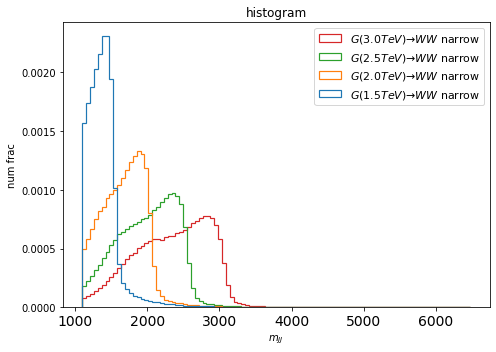

In [8]:
masses = [feat['mJJ'] for feat in input_data.values()]
labels = [sc.sample_label[n] for n in BSM_samples]

_ = plot_hist(masses, xlabel=r'$m_{JJ}$', legend=labels, ylogscale=False)

In [3]:
dataset = 'GtoTTNarr'
# concatenated input or files in directory
base_dir = result_dir #concat_subdir
location = input_loc #input_concat_loc

# Output

In [4]:
#pct = None
#if pct: dataset_name = '_'+str(int(pct*100))+'pct'
fig_dir = os.path.join('fig/analysis_result_data', plt_dir_name[dataset])
!mkdir -p $fig_dir
print('plotting to', fig_dir)

plotting to fig/analysis_result_data/GtoTTnarrow


# mass_JJ analysis

In [6]:
# print(data.dtype.names)
# data["mJJ"][:10]

In [7]:
# labels = [b'mJJ', b'j1Pt', b'j1Eta', b'j1Phi', b'j1M', b'j1E', b'j2Pt', b'j2M', b'j2E', b'DeltaEtaJJ', b'DeltaPhiJJ', b'j1TotalLoss', b'j1RecoLoss', b'j1KlLoss', b'j2TotalLoss', b'j2RecoLoss', b'j2KlLoss']
# labels = [s.decode("utf-8")  for s in labels]
# print(labels)

max m_jj 6841.994


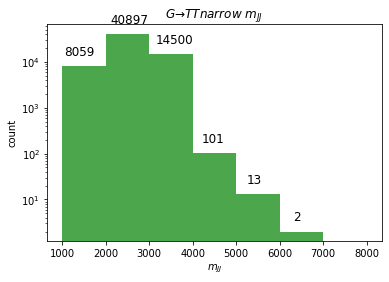

In [8]:
bins = np.arange(1000,9000,1000)
max_mjj = np.max(data['mJJ'])
print('max m_jj',max_mjj)
plot_counting_hist( data['mJJ'], bins=bins, xlabel=r'$m_{JJ}$', ylabel='count', title=plt_title[dataset] + r' $m_{JJ}$', plot_name=plt_name[dataset]+'_mjj', fig_dir=fig_dir )

# pt-analysis

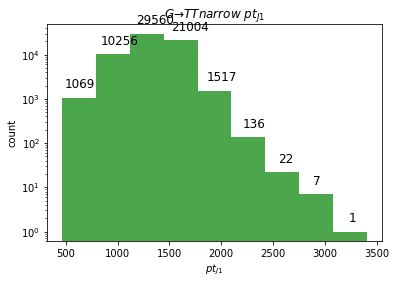

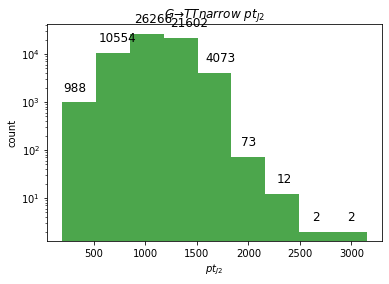

In [9]:
min_j1pt = np.min(data['j1Pt'])
min_j2pt = np.min(data['j2Pt'])
max_j1pt = np.max(data['j1Pt'])
max_j2pt = np.max(data['j2Pt'])
bins_j1 = np.linspace(min_j1pt,max_j1pt+1,10)
bins_j2 = np.linspace(min_j2pt,max_j2pt+1,10)
plot_counting_hist( data['j1Pt'], bins=bins_j1, xlabel=r'$pt_{J1}$', ylabel='count', title=plt_title[dataset]+r' $pt_{J1}$', plot_name=plt_name[dataset]+'_pt_j1', fig_dir=fig_dir )
plot_counting_hist( data['j2Pt'], bins=bins_j2, xlabel=r'$pt_{J2}$', ylabel='count', title=plt_title[dataset]+r' $pt_{J2}$', plot_name=plt_name[dataset]+'_pt_j2', fig_dir=fig_dir )

# loss analysis

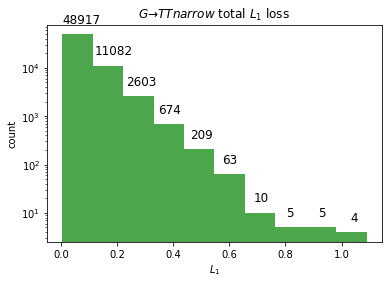

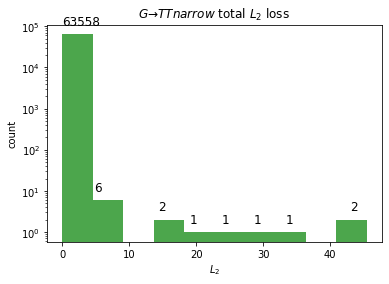

In [10]:
# histogram
plot_counting_hist( data['j1TotalLoss'], bins=10, xlabel=r'$L_{1}$', ylabel='count', title=plt_title[dataset]+r' total $L_{1}$ loss', plot_name=plt_name[dataset]+'_L1', fig_dir=fig_dir )
plot_counting_hist( data['j2TotalLoss'], bins=10, xlabel=r'$L_{2}$', ylabel='count', title=plt_title[dataset]+r' total $L_{2}$ loss', plot_name=plt_name[dataset]+'_L2', fig_dir=fig_dir )

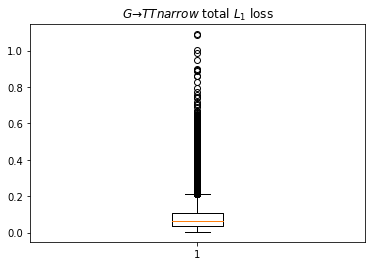

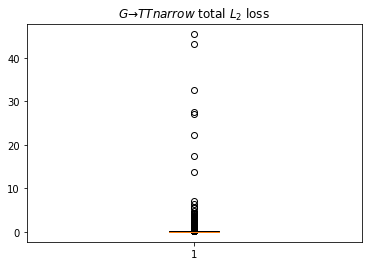

In [11]:
# box plots
plot_boxplot(data['j1TotalLoss'],title=plt_title[dataset]+r' total $L_{1}$ loss',plot_name=plt_name[dataset]+'_L1',fig_dir=fig_dir)
plot_boxplot(data['j2TotalLoss'],title=plt_title[dataset]+r' total $L_{2}$ loss',plot_name=plt_name[dataset]+'_L2',fig_dir=fig_dir)

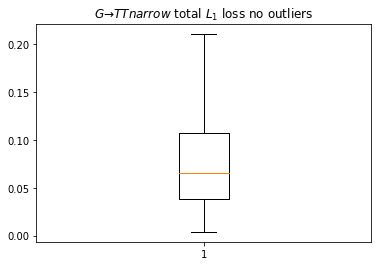

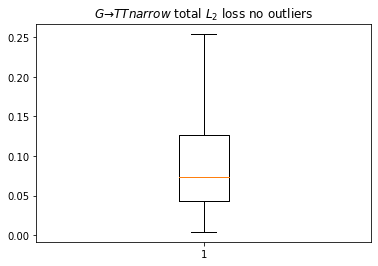

In [12]:
# box plots no outlier
plot_boxplot(data['j1TotalLoss'],title=plt_title[dataset]+r' total $L_{1}$ loss no outliers',plot_name=plt_name[dataset]+'_L1_no_outlier',fig_dir=fig_dir, outlier=False)
plot_boxplot(data['j2TotalLoss'],title=plt_title[dataset]+r' total $L_{2}$ loss no outliers',plot_name=plt_name[dataset]+'_L2_no_outlier',fig_dir=fig_dir, outlier=False)

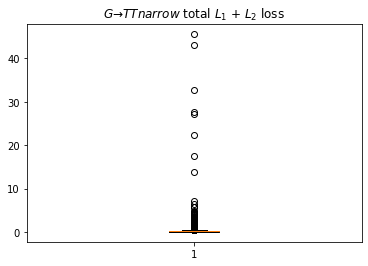

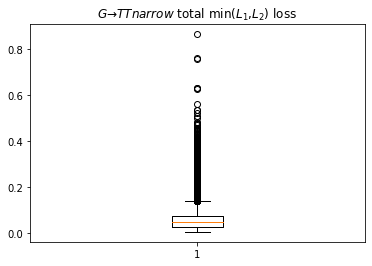

In [13]:
# box plots
plot_boxplot(data['j1TotalLoss']+data['j2TotalLoss'],title=plt_title[dataset]+r' total $L_{1}$ + $L_{2}$ loss',plot_name=plt_name[dataset]+'_sumL1L2')
plot_boxplot(np.minimum(data['j1TotalLoss'],data['j2TotalLoss']),title=plt_title[dataset]+r' total min($L_{1}$,$L_{2}$) loss',plot_name=plt_name[dataset]+'_minL1L2')

In [14]:
#data[data['j2TotalLoss'] > 1]['mJJ']

# wirte concatenated results to file

In [15]:
file_path = os.path.join(concat_subdir,input_concat_loc[dataset])
write_results_recarray_to_file( data, file_path )

## L1 vs L2 binned by m_jj

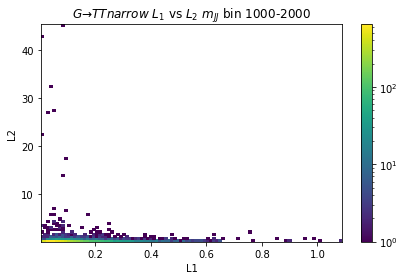

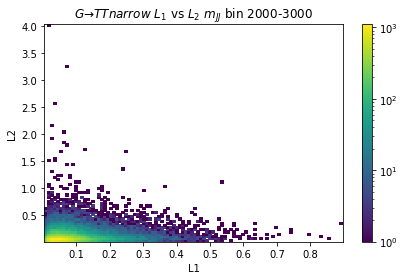

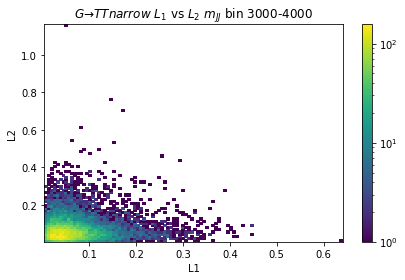

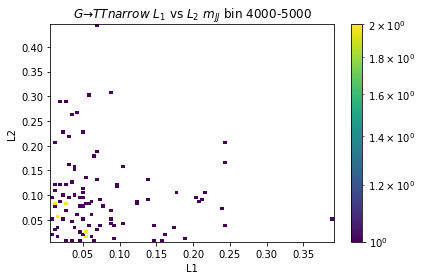

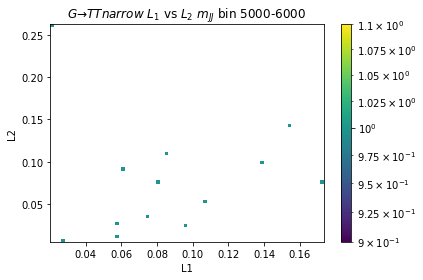

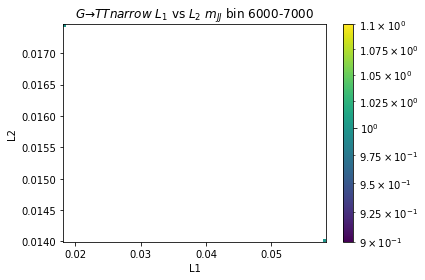

In [16]:
mjj_bins = np.arange(1000,max_mjj+1000,1000)
mjj_bin_idx = np.digitize(data['mJJ'], mjj_bins, right=True)

for b in range(1,len(mjj_bins)):
    title = plt_title[dataset]+r' $L_1$ vs $L_2$ $m_{JJ}$ bin '+str(int(mjj_bins[b-1]))+'-'+str(int(mjj_bins[b]))
    plt_name = title.replace(' ','_').replace('$','').replace('{','').replace('}','')
    plot_hist_2d(data[mjj_bin_idx == b]['j1TotalLoss'],data[mjj_bin_idx == b]['j2TotalLoss'], 'L1','L2', title, plt_name, fig_dir)
